# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [1]:
#Import all the necessary modules
import numpy as np
import pandas as pd

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


Load file 'diabetes.csv' from a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df

In [2]:
pima_df=pd.read_csv('diabetes.csv')

pima_df.describe().transpose()

pima_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [3]:
rows = np.random.choice(pima_df.index.values, 10)
sample_df = pima_df.iloc[rows]
##sample_df.head(20)
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [5]:
print(pima_df.dtypes)

print(pima_df.shape)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
(768, 9)


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [7]:
pima_cols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']

for x in pima_cols:
    pima_df[x]=pima_df[x].replace(0,pima_df[x].median())
    
pima_df.head()

##Replaced 0 with median value (except Pregnancies)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [8]:
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

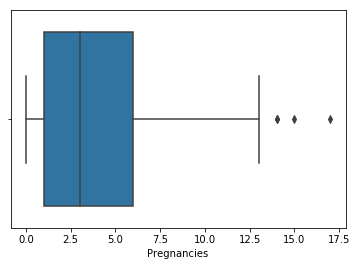

In [10]:
import seaborn as sns
sns.boxplot(pima_df['Pregnancies'])

#univariate - using box plot , Analyzed the distribution of variable

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

In [12]:
print(pima_df.var())

print(pima_df.corr())

print('DiabetesPedigreeFunction has valriance < 0.1 so this variable won\'t be much useful to predict the result, Hence dropping this variable from dataframe')

pima_df.drop(['DiabetesPedigreeFunction'],axis=1,inplace=True)

Pregnancies         11.354056
Glucose            926.489244
BloodPressure      146.328741
SkinThickness       85.174705
Insulin          11140.295536
BMI                 47.270664
Age                138.303046
Outcome              0.227483
dtype: float64
               Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
Pregnancies       1.000000  0.128213       0.208615       0.032568 -0.055697   
Glucose           0.128213  1.000000       0.218937       0.172143  0.357573   
BloodPressure     0.208615  0.218937       1.000000       0.147809 -0.028721   
SkinThickness     0.032568  0.172143       0.147809       1.000000  0.238188   
Insulin          -0.055697  0.357573      -0.028721       0.238188  1.000000   
BMI               0.021546  0.231400       0.281132       0.546951  0.189022   
Age               0.544341  0.266909       0.324915       0.054514 -0.015413   
Outcome           0.221898  0.492782       0.165723       0.189065  0.148457   

                    BMI 

KeyError: "['DiabetesPedigreeFunction'] not found in axis"

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Pairplot shows that BMI & Skin Thickness and Age & pregnanies are highly related to each other


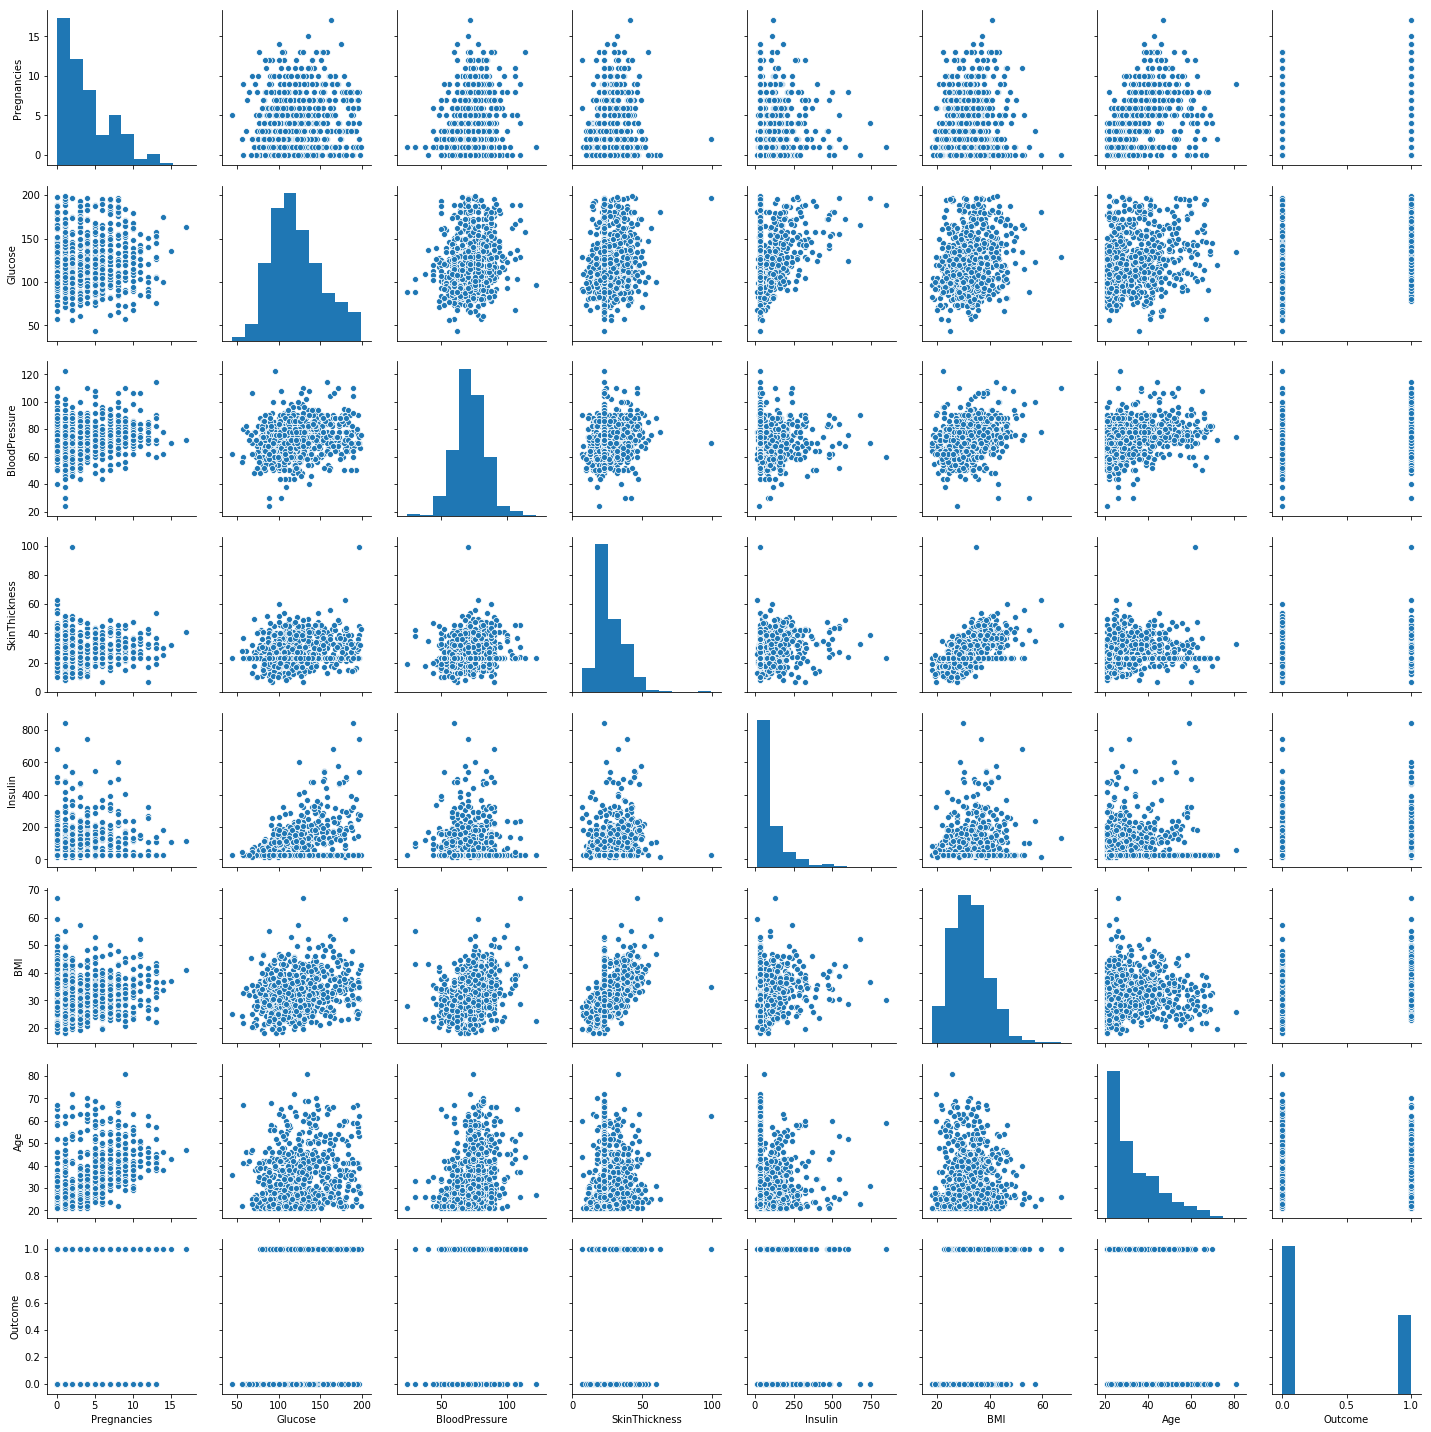

In [13]:
sns.pairplot(pima_df)

print('Pairplot shows that BMI & Skin Thickness and Age & pregnanies are highly related to each other')

Using the plot - infer the relationship between different variables

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [15]:
pima_df_mod = pima_df.drop(columns="Outcome")

X=pima_df_mod
y=pima_df['Outcome']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)


# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [19]:
from sklearn.tree import DecisionTreeClassifier                                 
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5,min_impurity_decrease=0.01)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.01, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [26]:
y_predict_test = dt_model.predict(X_test)
y_predict_train = dt_model.predict(X_train)

from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_predict_test))

print("Train accuracy is", accuracy_score(y_train,y_predict_train))
print("Test accuracy is", accuracy_score(y_test,y_predict_test))

dt_model.classes_

from sklearn.metrics import roc_auc_score


print(roc_auc_score(y_test,y_predict_test))

[[128  18]
 [ 37  48]]
Train accuracy is 0.7802607076350093
Test accuracy is 0.7619047619047619
0.7207091055600322


Print the feature importance of the decision model - Optional

In [21]:
print('Type 1 Error is lesser when compared to Type 2 error')

print('Here Type 1 error is critical than Type 2 error')

print('Type 2 - Predicted is True but Actual is false - Predicted the person is having diabetes but the actual she dont\'t have diabetes')


print('Accuracy is more or less same for Test & Training data, so it\'s a good prediction')




Train accuracy is 0.7802607076350093
Test accuracy is 0.7619047619047619


# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [28]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier                               
dt_model_random = RandomForestClassifier(n_estimators =500,max_depth=10,random_state=1)

In [29]:
dt_model_random.fit(X_train, y_train)
y_predict_test = dt_model_random.predict(X_test)
y_predict_train = dt_model_random.predict(X_train)

print(confusion_matrix(y_test, y_predict_test))

print("Train accuracy is", accuracy_score(y_train,y_predict_train))
print("Test accuracy is", accuracy_score(y_test,y_predict_test))

[[128  18]
 [ 31  54]]
Train accuracy is 0.994413407821229
Test accuracy is 0.7878787878787878


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [32]:
from sklearn.ensemble import AdaBoostClassifier


dt_model_ada = AdaBoostClassifier(n_estimators=100,learning_rate=1)

In [33]:
dt_model_ada  = dt_model_ada .fit(X_train, y_train)

#Predict the response for test dataset
y_predict_testada = dt_model_ada.predict(X_test)
y_predict_trainada = dt_model_ada.predict(X_train)

print("Train accuracy is", accuracy_score(y_train,y_predict_trainada))
print("Test accuracy is", accuracy_score(y_test,y_predict_testada))

Train accuracy is 0.8324022346368715
Test accuracy is 0.7835497835497836


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [ ]:
#Bagging calssifier

from sklearn.ensemble import BaggingClassifier

dt_model_bag = BaggingClassifier(base_estimator=dt_model, n_estimators=100,random_state=1)

dt_model_bag = dt_model_bag.fit(X_train, y_train)

y_predict_testbag = dt_model_bag.predict(X_test)
y_predict_trainbag = dt_model_bag.predict(X_train)

print(confusion_matrix(y_test, y_predict_testbag))

In [ ]:
print("Train accuracy is", accuracy_score(y_train,y_predict_trainbag))
print("Test accuracy is", accuracy_score(y_test,y_predict_testbag))

# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [35]:
## !pip install xgboost

import xgboost as xgb

In [36]:
from sklearn.model_selection import train_test_split

X_train_xg, X_test_xg, y_train_xg, y_test_xg = train_test_split(X, y, test_size=.30, random_state=1)

dt_model_xg = xgb.XGBClassifier(max_depth=7,
                           min_child_weight=1,
                           learning_rate=0.1,
                           n_estimators=200,
                           silent=True,
                           objective='binary:logistic',
                           gamma=0,
                           max_delta_step=0,
                           subsample=1,
                           colsample_bytree=1,
                           colsample_bylevel=1,
                           reg_alpha=0,
                           reg_lambda=0,
                           scale_pos_weight=1,
                           seed=1,
                           missing=None)

dt_model_xg = dt_model_xg.fit(X_train_xg, y_train_xg)

y_predict_testxg = dt_model_xg.predict(X_test_xg)
y_predict_trainxg = dt_model_xg.predict(X_train_xg)

print("Train accuracy is", accuracy_score(y_train,y_predict_trainxg))
print("Test accuracy is", accuracy_score(y_test,y_predict_testxg))

Train accuracy is 1.0
Test accuracy is 0.7792207792207793


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.